In [94]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import re
import json
import codecs
import os

def factors(n):
    _factors=[]
    _factors.append(1)
    _factors.append(n)
    med=int(np.sqrt(n))+1
    for i in range(2,med):
        if n%i == 0:
            _factors.append(i)
            _factors.append(int(n/i))
    return(np.unique(_factors))

In [17]:
# Mujer

Nx=299
Ny=137
Nz=348

Lx=1.775
Ly=1.775
Lz=4.84

Vx=0
Vy=0
Vz=0

In [18]:
chorizo = []
with open('data/AF.dat') as my_file:
    # Este for salta las primeras 6 lineas de encabezado
    #for i in range(6):
    #    next(my_file)
    # Este for continua leyendo el resto del archivo
    for line in my_file:
        if len(line.strip()) != 0: # Condición de linea (no) vacía
            #l=line.strip() # "Limpia" los extremos y la pica en pedazos separados por espacios
            #l=re.sub(' +',' ',l)
            #l=l.split('\t')
            #l=list(map(int, l)) # Convierte los elementos en números
            l=list(map(int,(re.sub(' +', ' ', line.strip())).split(' ')))
            chorizo += l # Agrega la fila de números al arreglo

In [19]:
density=np.zeros([Nz,Ny,Nx])
for i in range(Nz):
    #print(i)
    for j in range(Ny):
        for k in range(Nx):
            #print(k+Nx*j+Nx*Ny*i)
            if chorizo[k+Nx*j+Nx*Ny*i]==122 or chorizo[k+Nx*j+Nx*Ny*i]==123 or chorizo[k+Nx*j+Nx*Ny*i]==124 or chorizo[k+Nx*j+Nx*Ny*i]==125:
                #print(chorizo[k+Nx*j+Nx*Ny*i])
                density[i][j][k]=1


In [20]:
organs=np.zeros([Nz,Ny,Nx])
for i in range(Nz):
    #print(i)
    for j in range(Ny):
        for k in range(Nx):
            #print(k+Nx*j+Nx*Ny*i)
            organs[i][j][k]=chorizo[k+Nx*j+Nx*Ny*i]

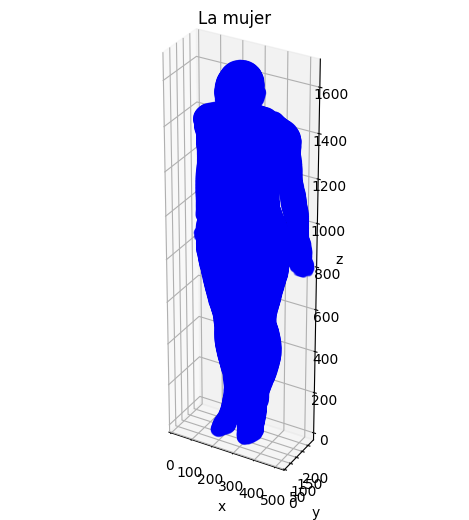

In [21]:
        xx=[]
        yy=[]
        zz=[]
        for i in range(Nz):
                for j in range(Ny):
                    for k in range(Nx):
                        # Se selecciona un voxel. Si la densidad es 1, se agregan las coordenadas del centro a los arreglos xx, yy y zz en forma correspondiente
                        if density[i][j][k]:
                            xx.append((k+.5)*Lx+Vx)
                            yy.append((j+.5)*Ly+Vy)
                            zz.append((i+.5)*Lz+Vz)
        # Isometrica
        ##
        #Set colours and render
        mcd=np.gcd.reduce(list(map(int,np.multiply(np.array([Nx,Ny,Nz]),np.array([Lx,Ly,Lz]))))) #https://stackoverflow.com/questions/29194588/python-gcd-for-list
        fig = plt.figure()
        #ax = fig.add_subplot(111, projection='3d')
        ax = fig.add_subplot(projection='3d')
        ax.set_box_aspect(aspect = list(map(int,np.multiply(np.array([Nx,Ny,Nz]),np.array([Lx,Ly,Lz]))))/mcd)  #(2,2,1))
        #ax.plot_surface(x, y, z,  rstride=1, cstride=1, color='c', alpha=0.1, linewidth=0)
        ax.scatter(xx,yy,zz,color="b", alpha=0.1,s=20)
        ax.set_xlim([Vx,Vx+Nx*Lx])
        ax.set_ylim([Vy,Vy+Ny*Ly])
        ax.set_zlim([Vz,Vz+Nz*Lz])
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        #ax.set_aspect("equal")
        plt.tight_layout()
        ax.set_title("La mujer", va='bottom')
        plt.show()

In [32]:
b=density.tolist()
densityAndMetadata=[]
densityAndMetadata.append([{'Length unit': 'mm',
                            'X direction': 'right to left','Lx': '1.775','Nx': '299',
                            'Y direction': 'front to back','Ly': '1.775','Ny': '137',
                            'Z direction': 'feet to head','Lz': '4.84','Nz': '348',
                            'Name':'Jane','Sex':'F','Type':'ICRP Antropomorphic Phantom'}])
#densityAndMetadata.append(self.volumenInfo)
densityAndMetadata.append(b)
json.dump(densityAndMetadata, codecs.open('skinJane.json', 'w', encoding='utf-8'), 
          separators=(',', ':'), 
          sort_keys=True, 
          indent=4)

In [24]:
b=organs.tolist()
densityAndMetadata=[]
densityAndMetadata.append([{'Length unit': 'mm',
                            'X direction': 'right to left','Lx': '1.775','Nx': '299',
                            'Y direction': 'front to back','Ly': '1.775','Ny': '137',
                            'Z direction': 'feet to head','Lz': '4.84','Nz': '348',
                            'Name':'Jane','Sex':'F','Type':'ICRP Antropomorphic Phantom'}])
#densityAndMetadata.append(self.volumenInfo)
densityAndMetadata.append(b)
json.dump(densityAndMetadata, codecs.open('organsJane.json', 'w', encoding='utf-8'), 
          separators=(',', ':'), 
          sort_keys=True, 
          indent=4)

In [25]:
# Hombre

Nx=254
Ny=127
Nz=222

Lx=2.137
Ly=2.137
Lz=8

Vx=0
Vy=0
Vz=0

In [26]:
chorizo = []
with open('data/AM.dat') as my_file:
    # Este for salta las primeras 6 lineas de encabezado
    #for i in range(6):
    #    next(my_file)
    # Este for continua leyendo el resto del archivo
    for line in my_file:
        if len(line.strip()) != 0: # Condición de linea (no) vacía
            #l=line.strip() # "Limpia" los extremos y la pica en pedazos separados por espacios
            #l=re.sub(' +',' ',l)
            #l=l.split('\t')
            #l=list(map(int, l)) # Convierte los elementos en números
            l=list(map(int,(re.sub(' +', ' ', line.strip())).split(' ')))
            chorizo += l # Agrega la fila de números al arreglo

In [27]:
density=np.zeros([Nz,Ny,Nx])
for i in range(Nz):
    #print(i)
    for j in range(Ny):
        for k in range(Nx):
            #print(k+Nx*j+Nx*Ny*i)
            if chorizo[k+Nx*j+Nx*Ny*i]==122 or chorizo[k+Nx*j+Nx*Ny*i]==123 or chorizo[k+Nx*j+Nx*Ny*i]==124 or chorizo[k+Nx*j+Nx*Ny*i]==125:
                #print(chorizo[k+Nx*j+Nx*Ny*i])
                density[i][j][k]=1

In [28]:
organs=np.zeros([Nz,Ny,Nx])
for i in range(Nz):
    #print(i)
    for j in range(Ny):
        for k in range(Nx):
            #print(k+Nx*j+Nx*Ny*i)
            organs[i][j][k]=chorizo[k+Nx*j+Nx*Ny*i]

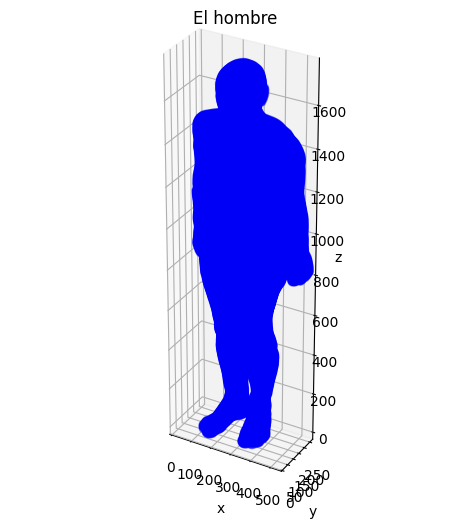

In [29]:
        xx=[]
        yy=[]
        zz=[]
        for i in range(Nz):
                for j in range(Ny):
                    for k in range(Nx):
                        # Se selecciona un voxel. Si la densidad es 1, se agregan las coordenadas del centro a los arreglos xx, yy y zz en forma correspondiente
                        if density[i][j][k]:
                            xx.append((k+.5)*Lx+Vx)
                            yy.append((j+.5)*Ly+Vy)
                            zz.append((i+.5)*Lz+Vz)
        # Isometrica
        ##
        #Set colours and render
        mcd=np.gcd.reduce(list(map(int,np.multiply(np.array([Nx,Ny,Nz]),np.array([Lx,Ly,Lz]))))) #https://stackoverflow.com/questions/29194588/python-gcd-for-list
        fig = plt.figure()
        #ax = fig.add_subplot(111, projection='3d')
        ax = fig.add_subplot(projection='3d')
        ax.set_box_aspect(aspect = list(map(int,np.multiply(np.array([Nx,Ny,Nz]),np.array([Lx,Ly,Lz]))))/mcd)  #(2,2,1))
        #ax.plot_surface(x, y, z,  rstride=1, cstride=1, color='c', alpha=0.1, linewidth=0)
        ax.scatter(xx,yy,zz,color="b", alpha=0.1,s=20)
        ax.set_xlim([Vx,Vx+Nx*Lx])
        ax.set_ylim([Vy,Vy+Ny*Ly])
        ax.set_zlim([Vz,Vz+Nz*Lz])
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        #ax.set_aspect("equal")
        plt.tight_layout()
        ax.set_title("El hombre", va='bottom')
        plt.show()

In [30]:
b=density.tolist()
densityAndMetadata=[]
densityAndMetadata.append([{'Length unit': 'mm',
                            'X direction': 'right to left','Lx': '2.137','Nx': '254',
                            'Y direction': 'front to back','Ly': '2.137','Ny': '127',
                            'Z direction': 'feet to head','Lz': '8','Nz': '222',
                            'Name':'John','Sex':'M','Type':'ICRP Antropomorphic Phantom'}])
#densityAndMetadata.append(self.volumenInfo)
densityAndMetadata.append(b)
json.dump(densityAndMetadata, codecs.open('skinJohn.json', 'w', encoding='utf-8'), 
          separators=(',', ':'), 
          sort_keys=True, 
          indent=4)

In [31]:
b=organs.tolist()
densityAndMetadata=[]
densityAndMetadata.append([{'Length unit': 'mm',
                            'X direction': 'right to left','Lx': '2.137','Nx': '254',
                            'Y direction': 'front to back','Ly': '2.137','Ny': '127',
                            'Z direction': 'feet to head','Lz': '8','Nz': '222',
                            'Name':'John','Sex':'M','Type':'ICRP Antropomorphic Phantom'}])
#densityAndMetadata.append(self.volumenInfo)
densityAndMetadata.append(b)
json.dump(densityAndMetadata, codecs.open('organsJohn.json', 'w', encoding='utf-8'), 
          separators=(',', ':'), 
          sort_keys=True, 
          indent=4)

## Clase

In [78]:
class ICRP_phantom:
    'Caja para contener un phantom'
    # Esta clase define el volumen donde vive el objeto de estudio (universo)
    # El universo es un paralelepipedo voxelizado, paralelo a los planos cartesianos en el primer octante
    # Nx,Ny,Nz son el numero de divisiones en cada eje del parelepipedo
    # Lx,Ly,Lz son las longitudes de arista de cada voxel
    # Vx,Vy,Vz son las coordenadas del origen del volumen medidas en longitud absoluta
    # Estos datos N,L y V estan resumidos en 'volumenInfo'
    ###
    # Propiedades
    ###
    # density es la cantidad de materia media por unidad de volumen en cada voxel. Inicialmente se fija en cero
    # organs es la etiqueta que indica la presencia de un órgano particular en el voxel correspondiente. Inicialmente se fija en cero (no hay nada)
    # unidad es el sistema de unidades para medir longitudes. Por defecto es metros
    # conversion2metros es el factor de conversion necesario para operar con las unidades establecidas por el usuario. Si se decide no usar metros, es necesario redefinir la escala manualmente
    def __init__(self,Nx = 1000, Ny = 1000, Nz = 1000, Lx = 1.0, Ly = 1.0, Lz = 1.0, Vx = 0, Vy = 0, Vz = 0,unidad='mm',conversion2milimetros=1.0):
        self.Nx = Nx
        self.Ny = Ny
        self.Nz = Nz
        self.Lx = Lx*conversion2milimetros
        self.Ly = Ly*conversion2milimetros
        self.Lz = Lz*conversion2milimetros
        self.Vx = Vx
        self.Vy = Vy
        self.Vz = Vz
        self.unidad = unidad
        self.conversion2milimetros=conversion2milimetros
        self.N = np.array([self.Nx,self.Ny,self.Nz])
        self.L = np.array([self.Lx,self.Ly,self.Lz])
        self.V = np.array([self.Vx,self.Vy,self.Vz])
        self.density=np.zeros([self.Nx,self.Ny,self.Nz])
        self.organs=np.zeros([self.Nx,self.Ny,self.Nz])
        self.volumenInfo=[]
        self.volumenInfo.append('Volumen físico datos (N,L,V):')
        self.volumenInfo.append(self.N.tolist())
        self.volumenInfo.append(self.L.tolist())
        self.volumenInfo.append(self.V.tolist())
        self.densityInfo=[]
        self.phantomInfo=[]
        print("Volumen creado con celdas (Nx,Ny,Nz)=(", self.Nx, self.Ny, self.Nz,"), dimension de voxel (Lx,Ly,Lz)=(", self.Lx/self.conversion2milimetros, 
              self.Ly/self.conversion2milimetros, self.Lz/self.conversion2milimetros,
              "). Unidad de medida=",self.unidad,". Factor de conversion a milimetros (m)=",self.conversion2milimetros,". Todas distancias y coordenadas se suponen y operan en milimetros (mm)")
    def loadPhantom(self,name,To_mm=1.0):
        # To_mm es el factor de conversión a mm
        # Se usa en caso que el phantom a cargar esté en otro sistema
        if os.path.isfile(name):
            obj_text = codecs.open(name, 'r', encoding='utf-8').read()
            b_new = json.loads(obj_text)
            print(b_new[0])
            self.phantomInfo=b_new[0]
            #
            self.Nx = int(self.phantomInfo[0]['Nx'])
            self.Ny = int(self.phantomInfo[0]['Ny'])
            self.Nz = int(self.phantomInfo[0]['Nz'])
            self.Lx = float(self.phantomInfo[0]['Lx'])*To_mm
            self.Ly = float(self.phantomInfo[0]['Ly'])*To_mm
            self.Lz = float(self.phantomInfo[0]['Lz'])*To_mm
            #self.Vx = int(self.phantomInfo[0]['Vx'])
            #self.Vy = int(self.phantomInfo[0]['Vy'])
            #self.Vz = int(self.phantomInfo[0]['Vz'])
            #self.unidad = self.phantomInfo[0]['Length unit']
            #self.conversion2metros=conversion2metros
            self.N = np.array([self.Nx,self.Ny,self.Nz])
            self.L = np.array([self.Lx,self.Ly,self.Lz])
            self.V = np.array([self.Vx,self.Vy,self.Vz])
            self.density=np.zeros([self.Nx,self.Ny,self.Nz])
            self.organs=np.zeros([self.Nx,self.Ny,self.Nz])
            self.volumenInfo=[]
            self.volumenInfo.append('Volumen físico datos (N,L,V):')
            self.volumenInfo.append(self.N.tolist())
            self.volumenInfo.append(self.L.tolist())
            self.volumenInfo.append(self.V.tolist())
            self.densityInfo=[]
            #self.phantomInfo=[]
            print("Se ha redefinido el volumen con celdas (Nx,Ny,Nz)=(", self.Nx, self.Ny, self.Nz,"), dimension de voxel (Lx,Ly,Lz)=(", self.Lx, 
              self.Ly, self.Lz,
              "). Unidad de medida=",self.unidad,". Factor de conversion a metros (m)=",To_mm,". Todas distancias y coordenadas se suponen y operan en milímetros (mm)")

            #
            #linea=np.array(b_new[2])
            #print(linea)
            #print(self.N)
            #print(linea[0],linea[1],linea[2])
            #if linea[0]!=self.N[2] or linea[1]!=self.N[1] or linea[2]!=self.N[1]:
            #    return print('Error: Las dimensiones del arreglo a restaurar no coinciden con el volumen existente')
            self.organs=np.array(b_new[1])
            if self.phantomInfo[0]['Length unit']!=self.unidad:
                print("Las unidades de medida presupuesta y leída del archivo son diferentes!")
                print("Ajuste el patrón de conversion al cargar el phantom john.loadPhantom(file,To_mm=factor de conversion a mm)")


In [86]:
john=ICRP_phantom(unidad='m',conversion2milimetros=1000)

Volumen creado con celdas (Nx,Ny,Nz)=( 1000 1000 1000 ), dimension de voxel (Lx,Ly,Lz)=( 1.0 1.0 1.0 ). Unidad de medida= m . Factor de conversion a milimetros (m)= 1000 . Todas distancias y coordenadas se suponen y operan en milimetros (mm)


In [87]:
john.loadPhantom('organsJohn.json')

[{'Length unit': 'mm', 'Lx': '2.137', 'Ly': '2.137', 'Lz': '8', 'Name': 'John', 'Nx': '254', 'Ny': '127', 'Nz': '222', 'Sex': 'M', 'Type': 'ICRP Antropomorphic Phantom', 'X direction': 'right to left', 'Y direction': 'front to back', 'Z direction': 'feet to head'}]
Se ha redefinido el volumen con celdas (Nx,Ny,Nz)=( 254 127 222 ), dimension de voxel (Lx,Ly,Lz)=( 2.137 2.137 8.0 ). Unidad de medida= m . Factor de conversion a metros (m)= 1.0 . Todas distancias y coordenadas se suponen y operan en milímetros (mm)
Las unidades de medida presupuesta y leída del archivo son diferentes!
Ajuste el patrón de conversion al cargar el phantom john.loadPhantom(file,To_mm=factor de conversion a mm)


In [92]:
john.phantomInfo[0]['Name']

'John'

In [89]:
skin=np.zeros([Nz,Ny,Nx])
for i in range(Nz):
    #print(i)
    for j in range(Ny):
        for k in range(Nx):
            #print(k+Nx*j+Nx*Ny*i)
            #if chorizo[k+Nx*j+Nx*Ny*i]==122 or chorizo[k+Nx*j+Nx*Ny*i]==123 or chorizo[k+Nx*j+Nx*Ny*i]==124 or chorizo[k+Nx*j+Nx*Ny*i]==125:
            if john.organs[i][j][k]==122 or john.organs[i][j][k]==123 or john.organs[i][j][k]==124 or john.organs[i][j][k]==125:
                #print(chorizo[k+Nx*j+Nx*Ny*i])
                skin[i][j][k]=1

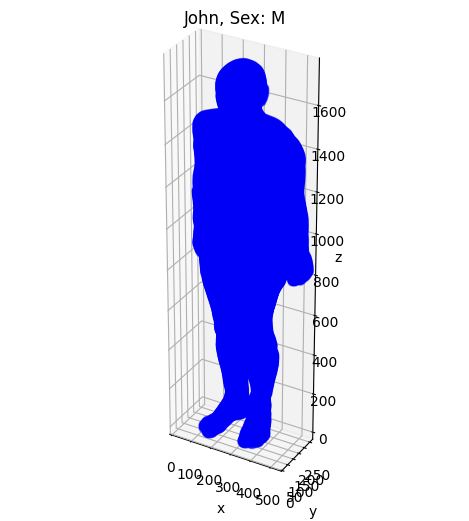

In [93]:
        xx=[]
        yy=[]
        zz=[]
        for i in range(Nz):
                for j in range(Ny):
                    for k in range(Nx):
                        # Se selecciona un voxel. Si la densidad es 1, se agregan las coordenadas del centro a los arreglos xx, yy y zz en forma correspondiente
                        if skin[i][j][k]:
                            xx.append((k+.5)*Lx+Vx)
                            yy.append((j+.5)*Ly+Vy)
                            zz.append((i+.5)*Lz+Vz)
        # Isometrica
        ##
        #Set colours and render
        mcd=np.gcd.reduce(list(map(int,np.multiply(np.array([Nx,Ny,Nz]),np.array([Lx,Ly,Lz]))))) #https://stackoverflow.com/questions/29194588/python-gcd-for-list
        fig = plt.figure()
        #ax = fig.add_subplot(111, projection='3d')
        ax = fig.add_subplot(projection='3d')
        ax.set_box_aspect(aspect = list(map(int,np.multiply(np.array([Nx,Ny,Nz]),np.array([Lx,Ly,Lz]))))/mcd)  #(2,2,1))
        #ax.plot_surface(x, y, z,  rstride=1, cstride=1, color='c', alpha=0.1, linewidth=0)
        ax.scatter(xx,yy,zz,color="b", alpha=0.1,s=20)
        ax.set_xlim([Vx,Vx+Nx*Lx])
        ax.set_ylim([Vy,Vy+Ny*Ly])
        ax.set_zlim([Vz,Vz+Nz*Lz])
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        #ax.set_aspect("equal")
        plt.tight_layout()
        ax.set_title(john.phantomInfo[0]['Name'] + ', Sex: ' + john.phantomInfo[0]['Sex'], va='bottom')
        plt.show()

In [117]:
Y=[]
for i in range(john.Nz):
    for j in range(john.Ny):
        for k in range(john.Nx):
            Y.append([i,j,k,john.organs[i][j][k]])
Y=pd.DataFrame(Y,columns=[0,1,2,3])

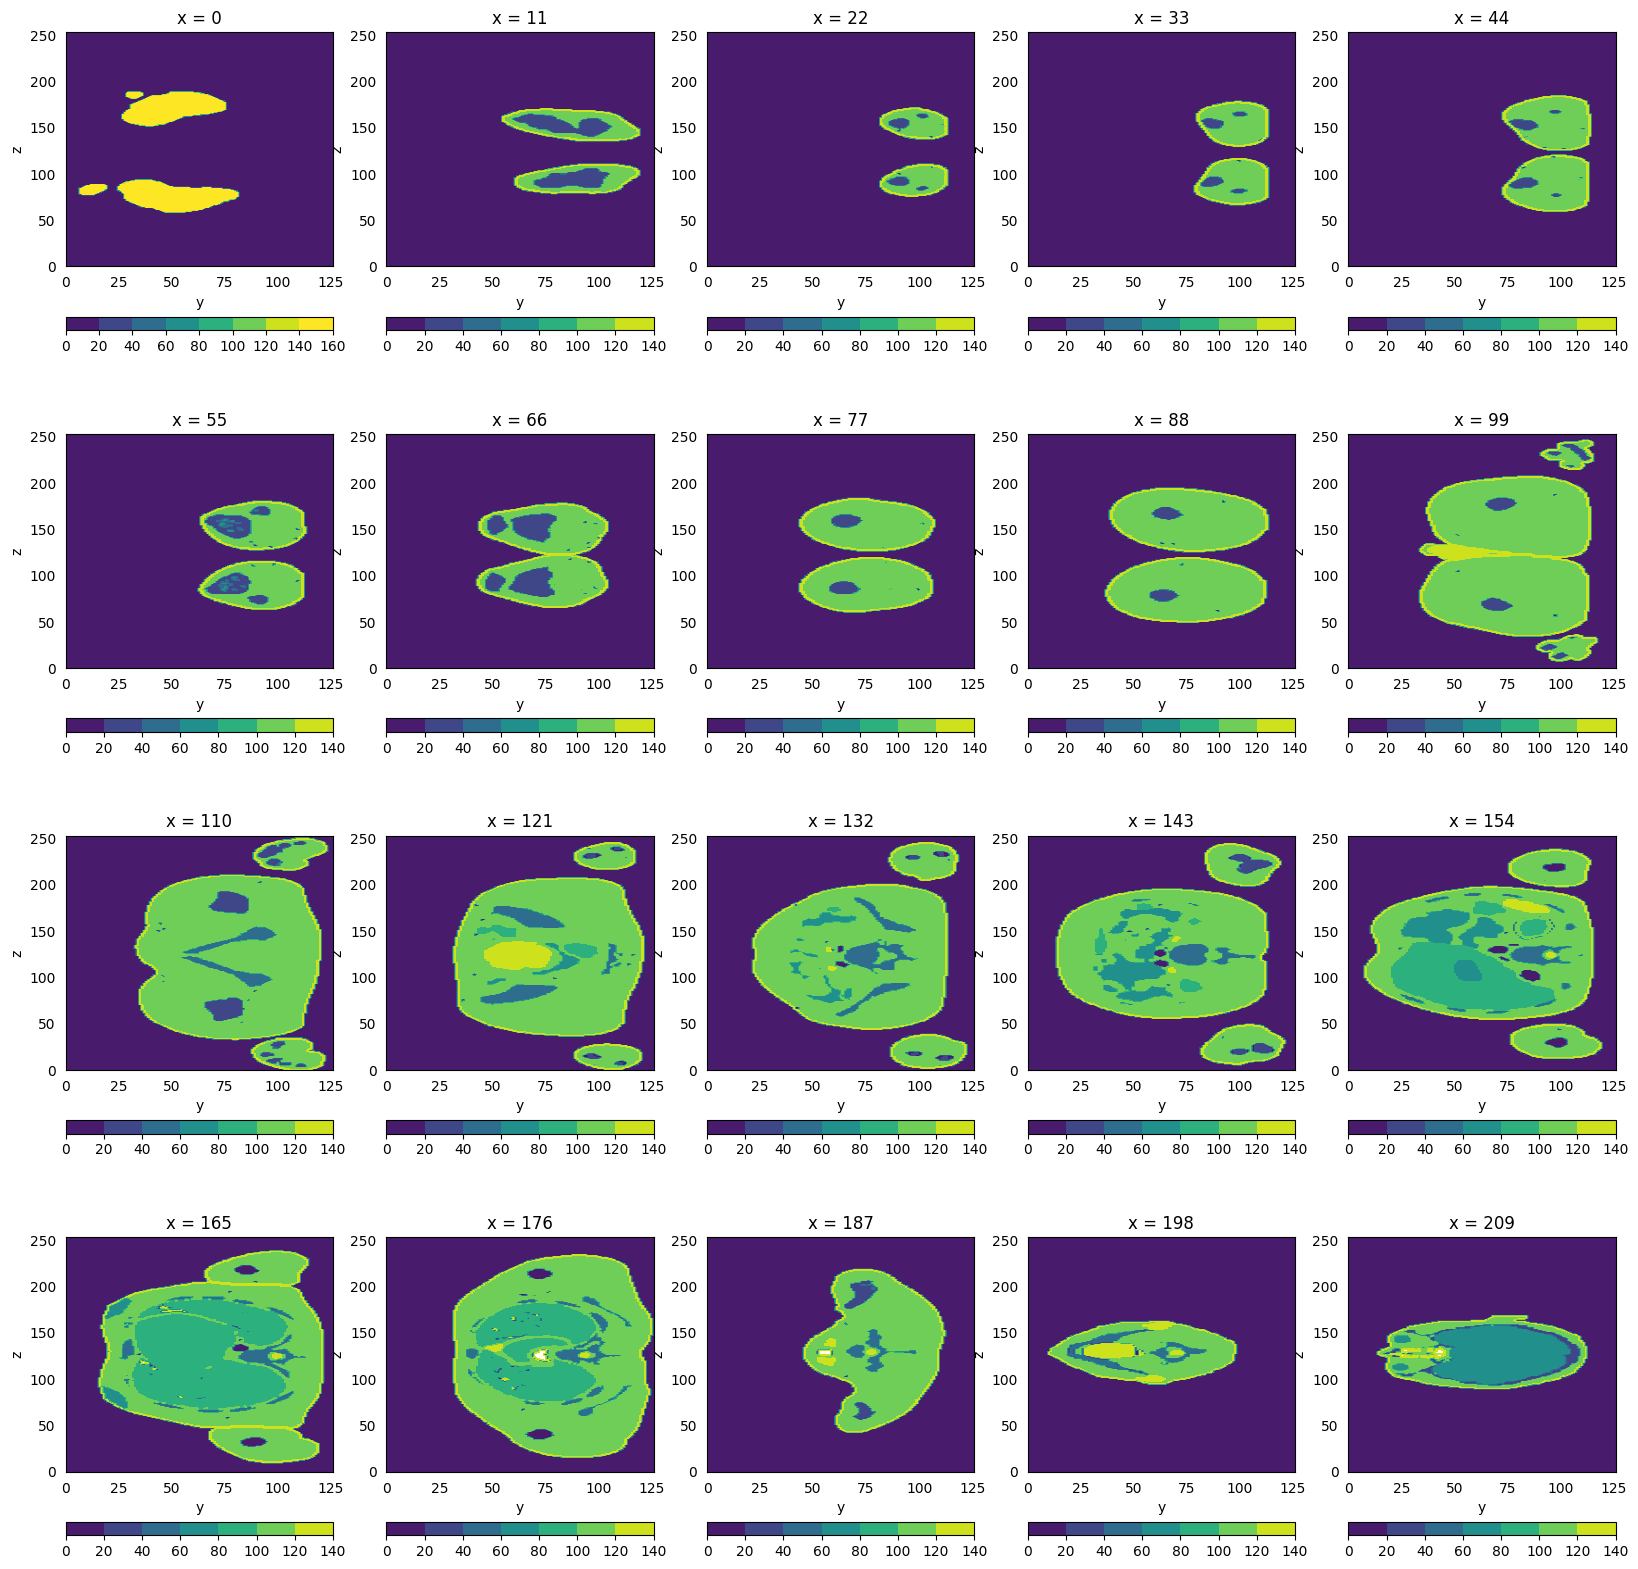

In [118]:
factores=factors(john.Nz)
if len(factores[factores<=5])>1:
    col=factores[factores<=5][-1]
else:
    col=factores[1]
row=int(john.Nz/col)
if john.Nz>30:
    col=5
    row=4
    muestreo=int(john.Nz/20)
else:
    muestreo=1
## Mantiene la misma escala lineal de color para todos los cortes (excluye el cero)
norm = plt.Normalize(np.nanmin(Y[3]), max(Y[3]))
## Mantiene la misma escala log de color para todos los cortes
#norm=colors.LogNorm(np.nanmin(Y[Y[3]>0][3]), max(Y[3]))
fig, axs = plt.subplots(row, col,figsize=(20,20))
for i in range(row):
    for j in range(col):
        #im = axs[i, j].tripcolor(Y[Y[0]==(i*col+j)*muestreo][1],Y[Y[0]==(i*col+j)*muestreo][2],
        #                    Y[Y[0]==(i*col+j)*muestreo][3],norm=norm)
        im = axs[i, j].tricontourf(Y[Y[0]==(i*col+j)*muestreo][1],Y[Y[0]==(i*col+j)*muestreo][2],
                            Y[Y[0]==(i*col+j)*muestreo][3],norm=norm)
        axs[i, j].tick_params(
            axis='both',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,  # ticks along the top edge are off
            right=False,
            left=False,
            labelbottom=True,
            labelleft=True)
        axs[i, j].set_xlabel('y')
        axs[i, j].set_ylabel('z')
        axs[i, j].title.set_text('x = ' + str((i*col+j)*muestreo))
        plt.colorbar(im, ax=axs[i, j],orientation='horizontal')

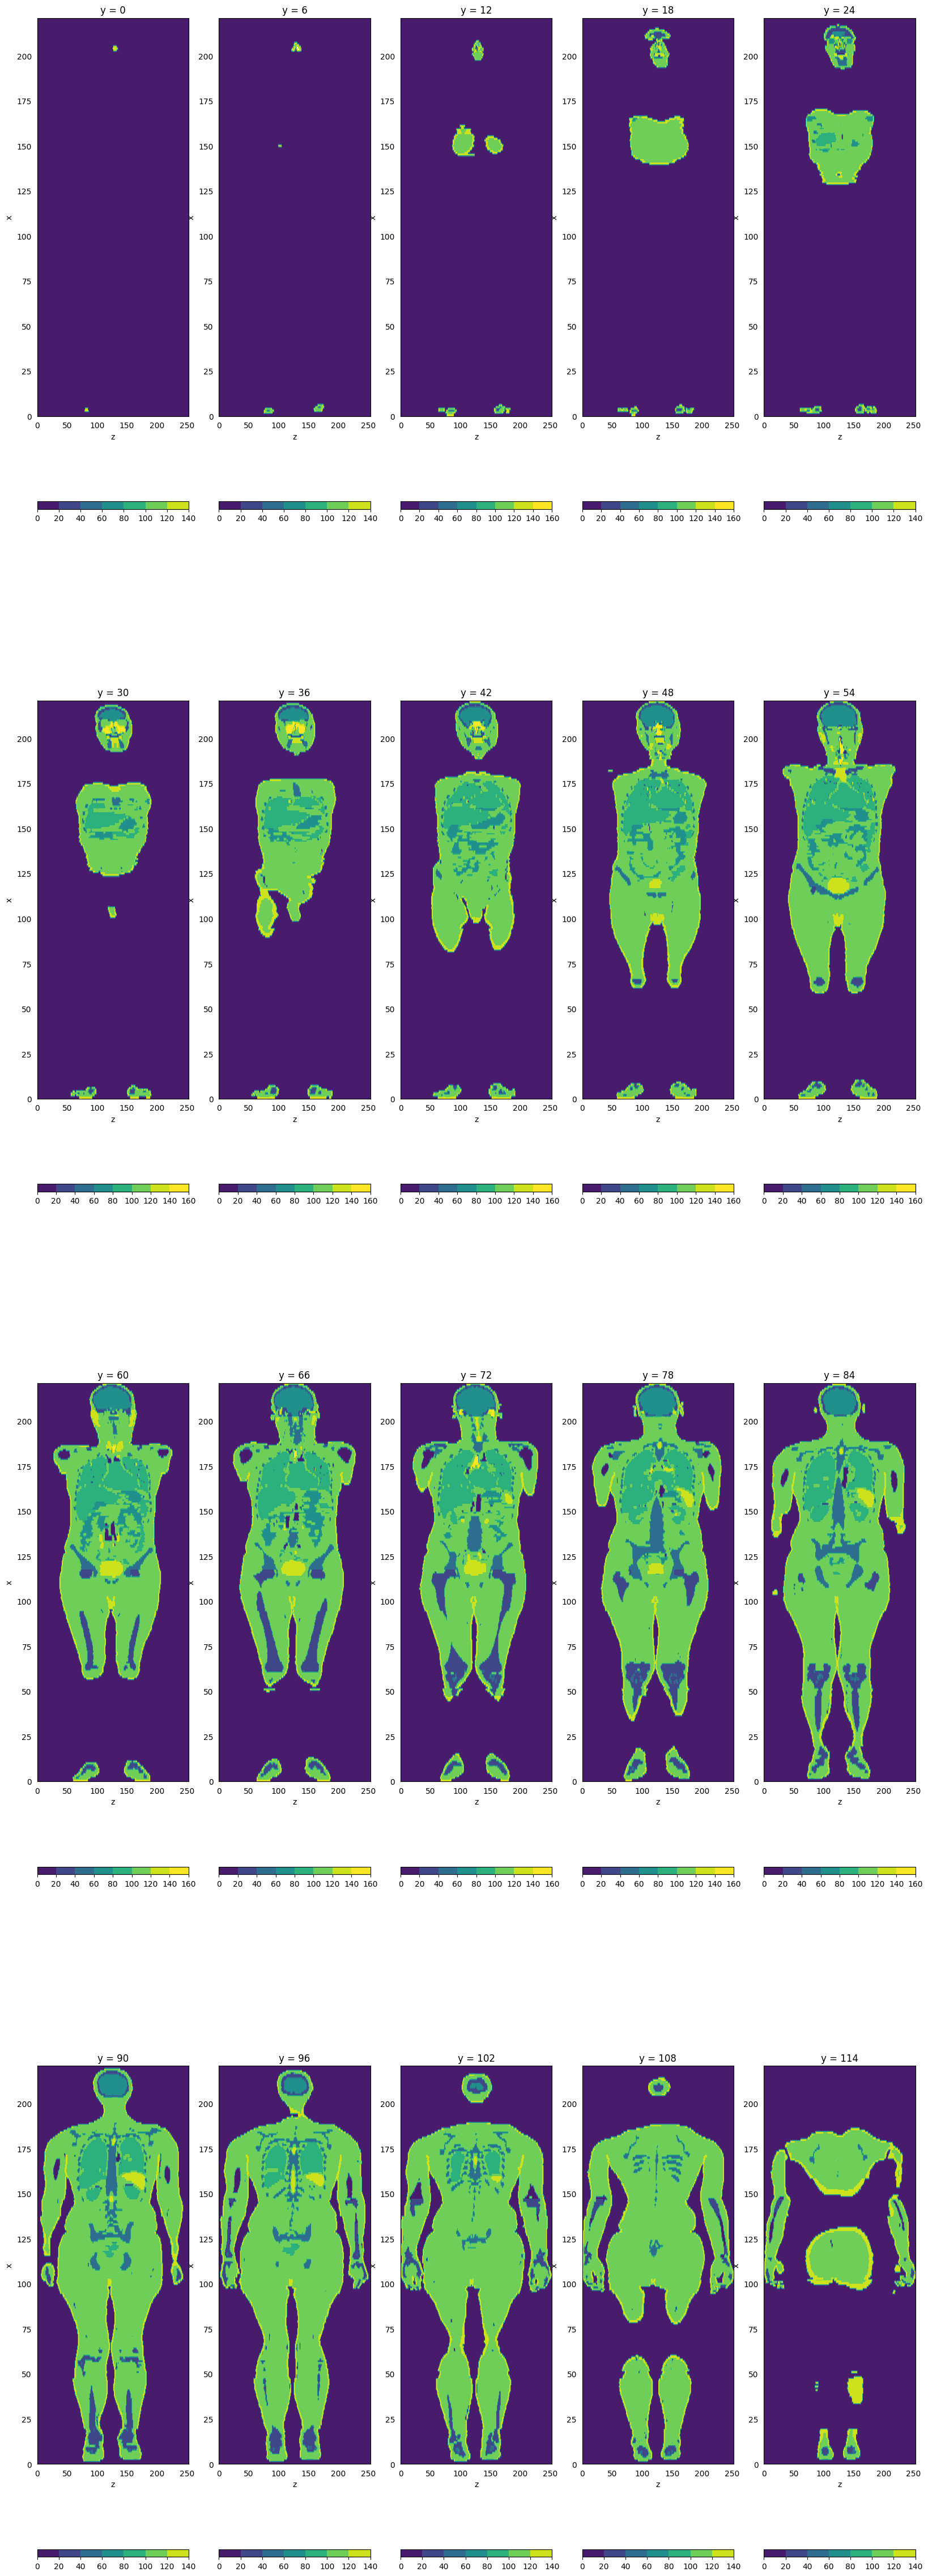

In [121]:
factores=factors(john.Ny)
if len(factores[factores<=5])>1:
    col=factores[factores<=5][-1]
else:
    col=factores[1]
row=int(john.Ny/col)
if john.Ny>30:
    col=5
    row=4
    muestreo=int(john.Ny/20)
else:
    muestreo=1
## Mantiene la misma escala lineal de color para todos los cortes (excluye el cero)
norm = plt.Normalize(np.nanmin(Y[3]), max(Y[3]))
## Mantiene la misma escala log de color para todos los cortes
#norm=colors.LogNorm(np.nanmin(Y[Y[3]>0][3]), max(Y[3]))
fig, axs = plt.subplots(row, col,figsize=(20,60))
for i in range(row):
    for j in range(col):
        #im = axs[i, j].tripcolor(Y[Y[1]==(i*col+j)*muestreo][2],Y[Y[1]==(i*col+j)*muestreo][0],
        #                    Y[Y[1]==(i*col+j)*muestreo][3],norm=norm)
        im = axs[i, j].tricontourf(Y[Y[1]==(i*col+j)*muestreo][2],Y[Y[1]==(i*col+j)*muestreo][0],
                            Y[Y[1]==(i*col+j)*muestreo][3],norm=norm)
        axs[i, j].tick_params(
            axis='both',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,  # ticks along the top edge are off
            right=False,
            left=False,
            labelbottom=True,
            labelleft=True)
        axs[i, j].set_xlabel('z')
        axs[i, j].set_ylabel('x')
        axs[i, j].title.set_text('y = ' + str((i*col+j)*muestreo))
        plt.colorbar(im, ax=axs[i, j],orientation='horizontal') 

In [122]:
jane=ICRP_phantom()

Volumen creado con celdas (Nx,Ny,Nz)=( 1000 1000 1000 ), dimension de voxel (Lx,Ly,Lz)=( 1.0 1.0 1.0 ). Unidad de medida= mm . Factor de conversion a milimetros (m)= 1.0 . Todas distancias y coordenadas se suponen y operan en milimetros (mm)


In [124]:
jane.loadPhantom('organsJane.json')

[{'Length unit': 'mm', 'Lx': '1.775', 'Ly': '1.775', 'Lz': '4.84', 'Name': 'Jane', 'Nx': '299', 'Ny': '137', 'Nz': '348', 'Sex': 'F', 'Type': 'ICRP Antropomorphic Phantom', 'X direction': 'right to left', 'Y direction': 'front to back', 'Z direction': 'feet to head'}]
Se ha redefinido el volumen con celdas (Nx,Ny,Nz)=( 299 137 348 ), dimension de voxel (Lx,Ly,Lz)=( 1.775 1.775 4.84 ). Unidad de medida= mm . Factor de conversion a metros (m)= 1.0 . Todas distancias y coordenadas se suponen y operan en milímetros (mm)


In [128]:
Y=[]
for i in range(jane.Nz):
    for j in range(jane.Ny):
        for k in range(jane.Nx):
            Y.append([i,j,k,jane.organs[i][j][k]])
Y=pd.DataFrame(Y,columns=[0,1,2,3])

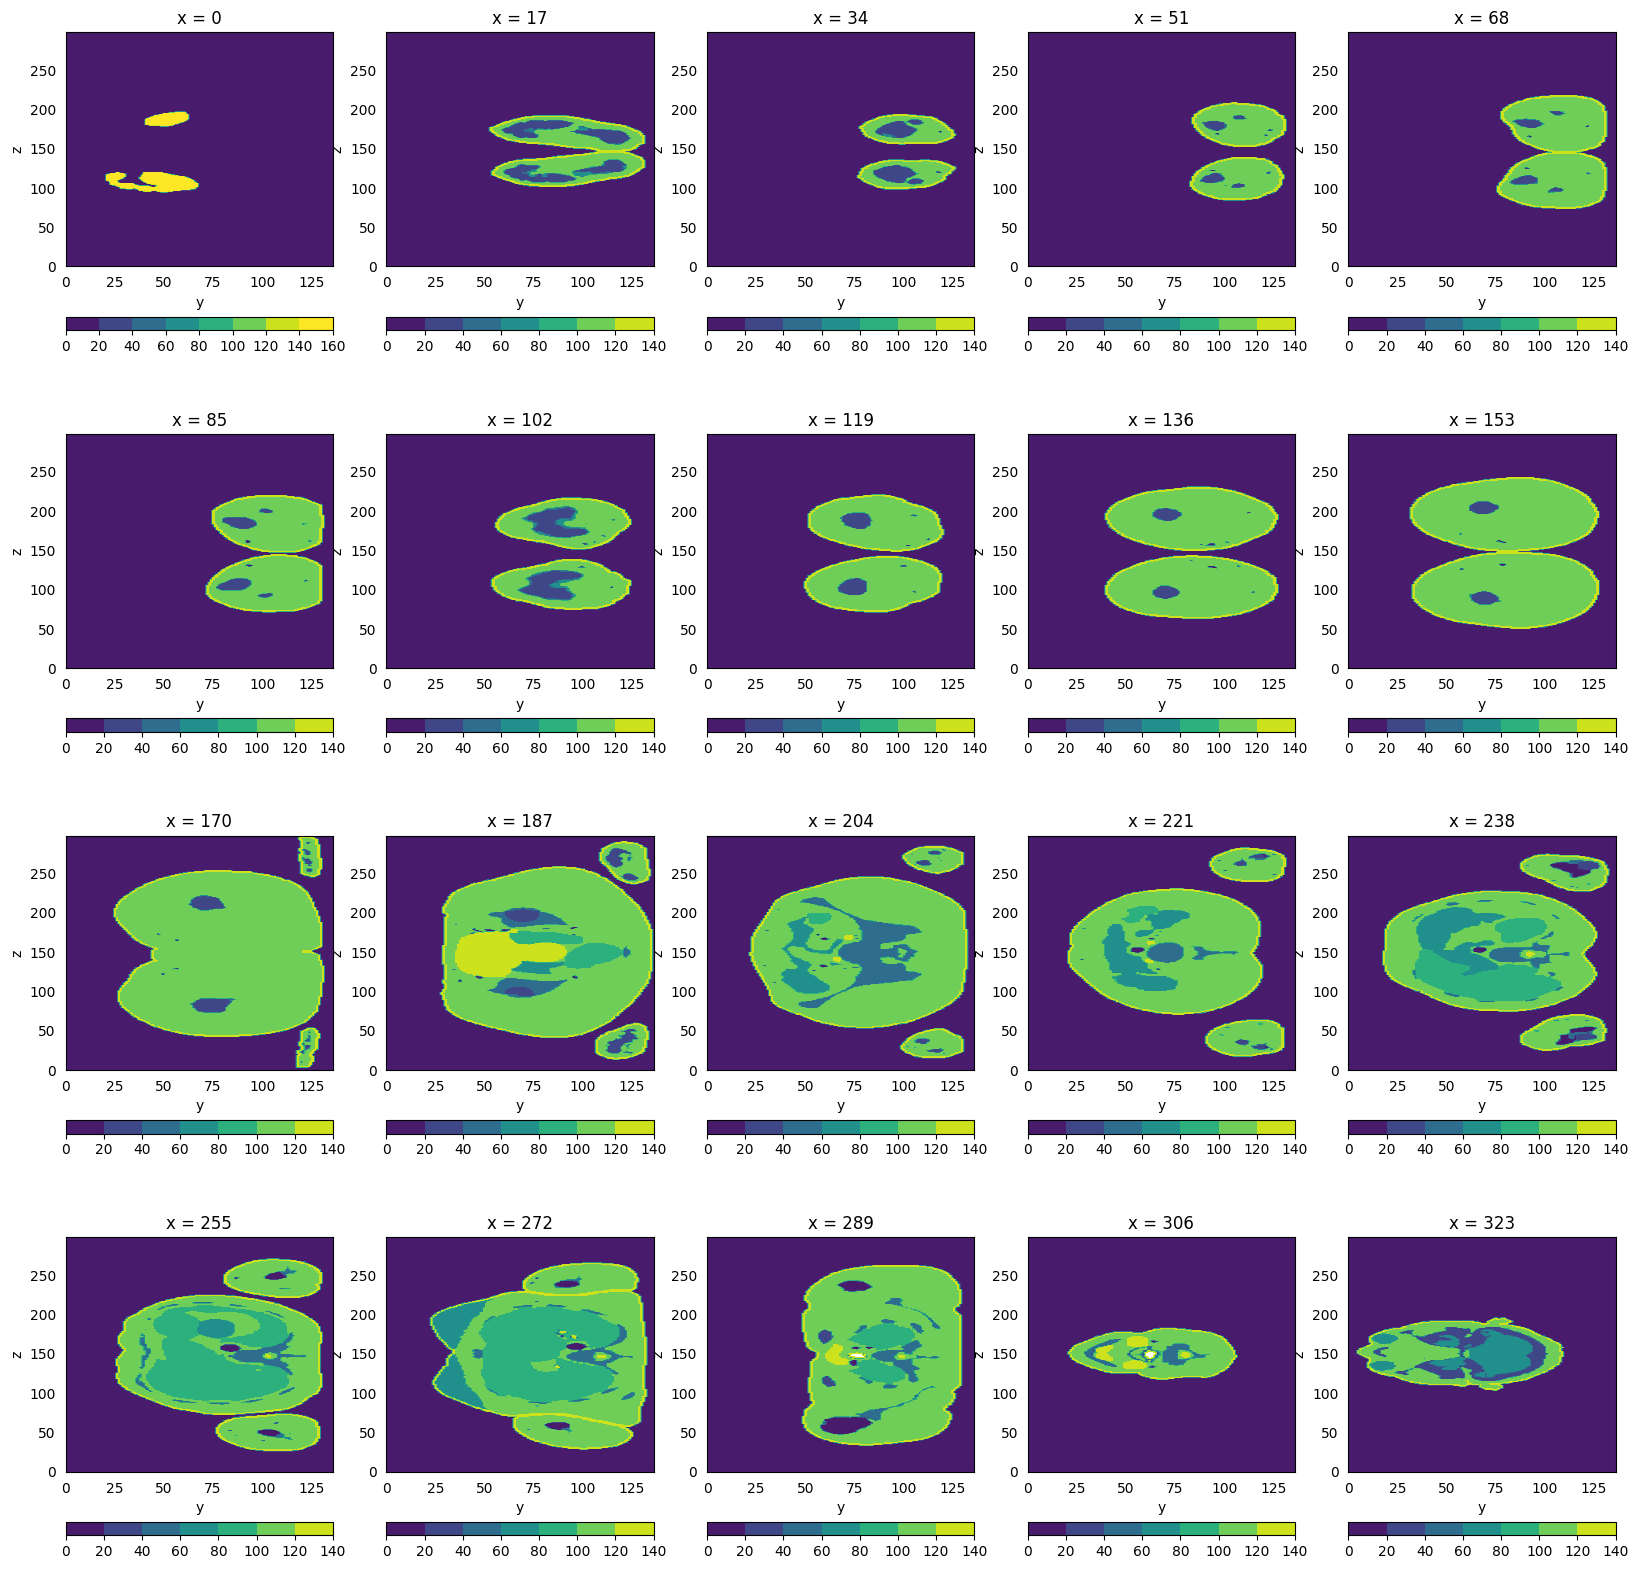

In [129]:
factores=factors(jane.Nz)
if len(factores[factores<=5])>1:
    col=factores[factores<=5][-1]
else:
    col=factores[1]
row=int(jane.Nz/col)
if john.Nz>30:
    col=5
    row=4
    muestreo=int(jane.Nz/20)
else:
    muestreo=1
## Mantiene la misma escala lineal de color para todos los cortes (excluye el cero)
norm = plt.Normalize(np.nanmin(Y[3]), max(Y[3]))
## Mantiene la misma escala log de color para todos los cortes
#norm=colors.LogNorm(np.nanmin(Y[Y[3]>0][3]), max(Y[3]))
fig, axs = plt.subplots(row, col,figsize=(20,20))
for i in range(row):
    for j in range(col):
        #im = axs[i, j].tripcolor(Y[Y[0]==(i*col+j)*muestreo][1],Y[Y[0]==(i*col+j)*muestreo][2],
        #                    Y[Y[0]==(i*col+j)*muestreo][3],norm=norm)
        im = axs[i, j].tricontourf(Y[Y[0]==(i*col+j)*muestreo][1],Y[Y[0]==(i*col+j)*muestreo][2],
                            Y[Y[0]==(i*col+j)*muestreo][3],norm=norm)
        axs[i, j].tick_params(
            axis='both',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,  # ticks along the top edge are off
            right=False,
            left=False,
            labelbottom=True,
            labelleft=True)
        axs[i, j].set_xlabel('y')
        axs[i, j].set_ylabel('z')
        axs[i, j].title.set_text('x = ' + str((i*col+j)*muestreo))
        plt.colorbar(im, ax=axs[i, j],orientation='horizontal')

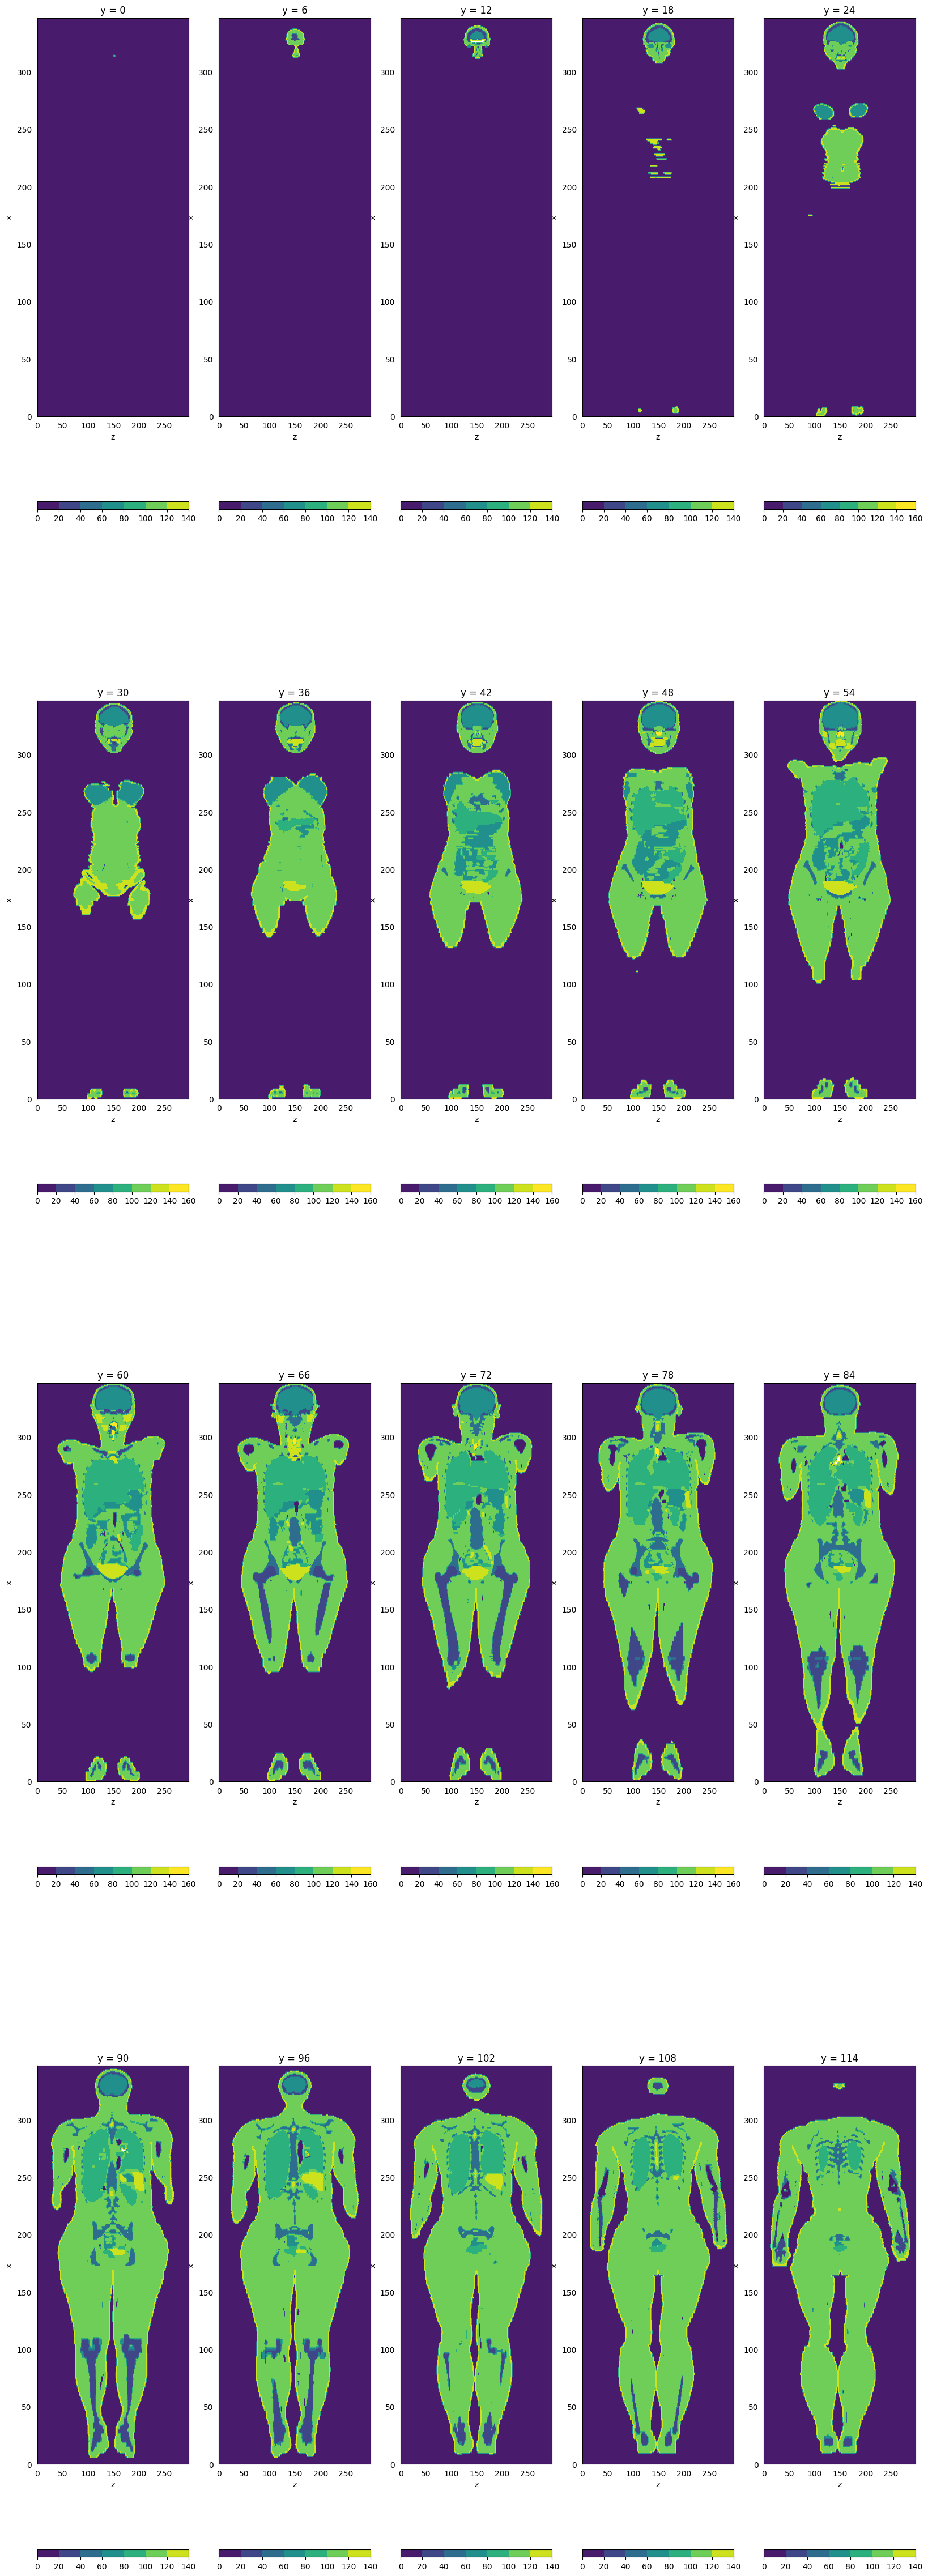

In [130]:
factores=factors(jane.Ny)
if len(factores[factores<=5])>1:
    col=factores[factores<=5][-1]
else:
    col=factores[1]
row=int(jane.Ny/col)
if john.Ny>30:
    col=5
    row=4
    muestreo=int(jane.Ny/20)
else:
    muestreo=1
## Mantiene la misma escala lineal de color para todos los cortes (excluye el cero)
norm = plt.Normalize(np.nanmin(Y[3]), max(Y[3]))
## Mantiene la misma escala log de color para todos los cortes
#norm=colors.LogNorm(np.nanmin(Y[Y[3]>0][3]), max(Y[3]))
fig, axs = plt.subplots(row, col,figsize=(20,60))
for i in range(row):
    for j in range(col):
        #im = axs[i, j].tripcolor(Y[Y[1]==(i*col+j)*muestreo][2],Y[Y[1]==(i*col+j)*muestreo][0],
        #                    Y[Y[1]==(i*col+j)*muestreo][3],norm=norm)
        im = axs[i, j].tricontourf(Y[Y[1]==(i*col+j)*muestreo][2],Y[Y[1]==(i*col+j)*muestreo][0],
                            Y[Y[1]==(i*col+j)*muestreo][3],norm=norm)
        axs[i, j].tick_params(
            axis='both',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,  # ticks along the top edge are off
            right=False,
            left=False,
            labelbottom=True,
            labelleft=True)
        axs[i, j].set_xlabel('z')
        axs[i, j].set_ylabel('x')
        axs[i, j].title.set_text('y = ' + str((i*col+j)*muestreo))
        plt.colorbar(im, ax=axs[i, j],orientation='horizontal') 

In [135]:
YY=Y.loc[Y[0] > 170]

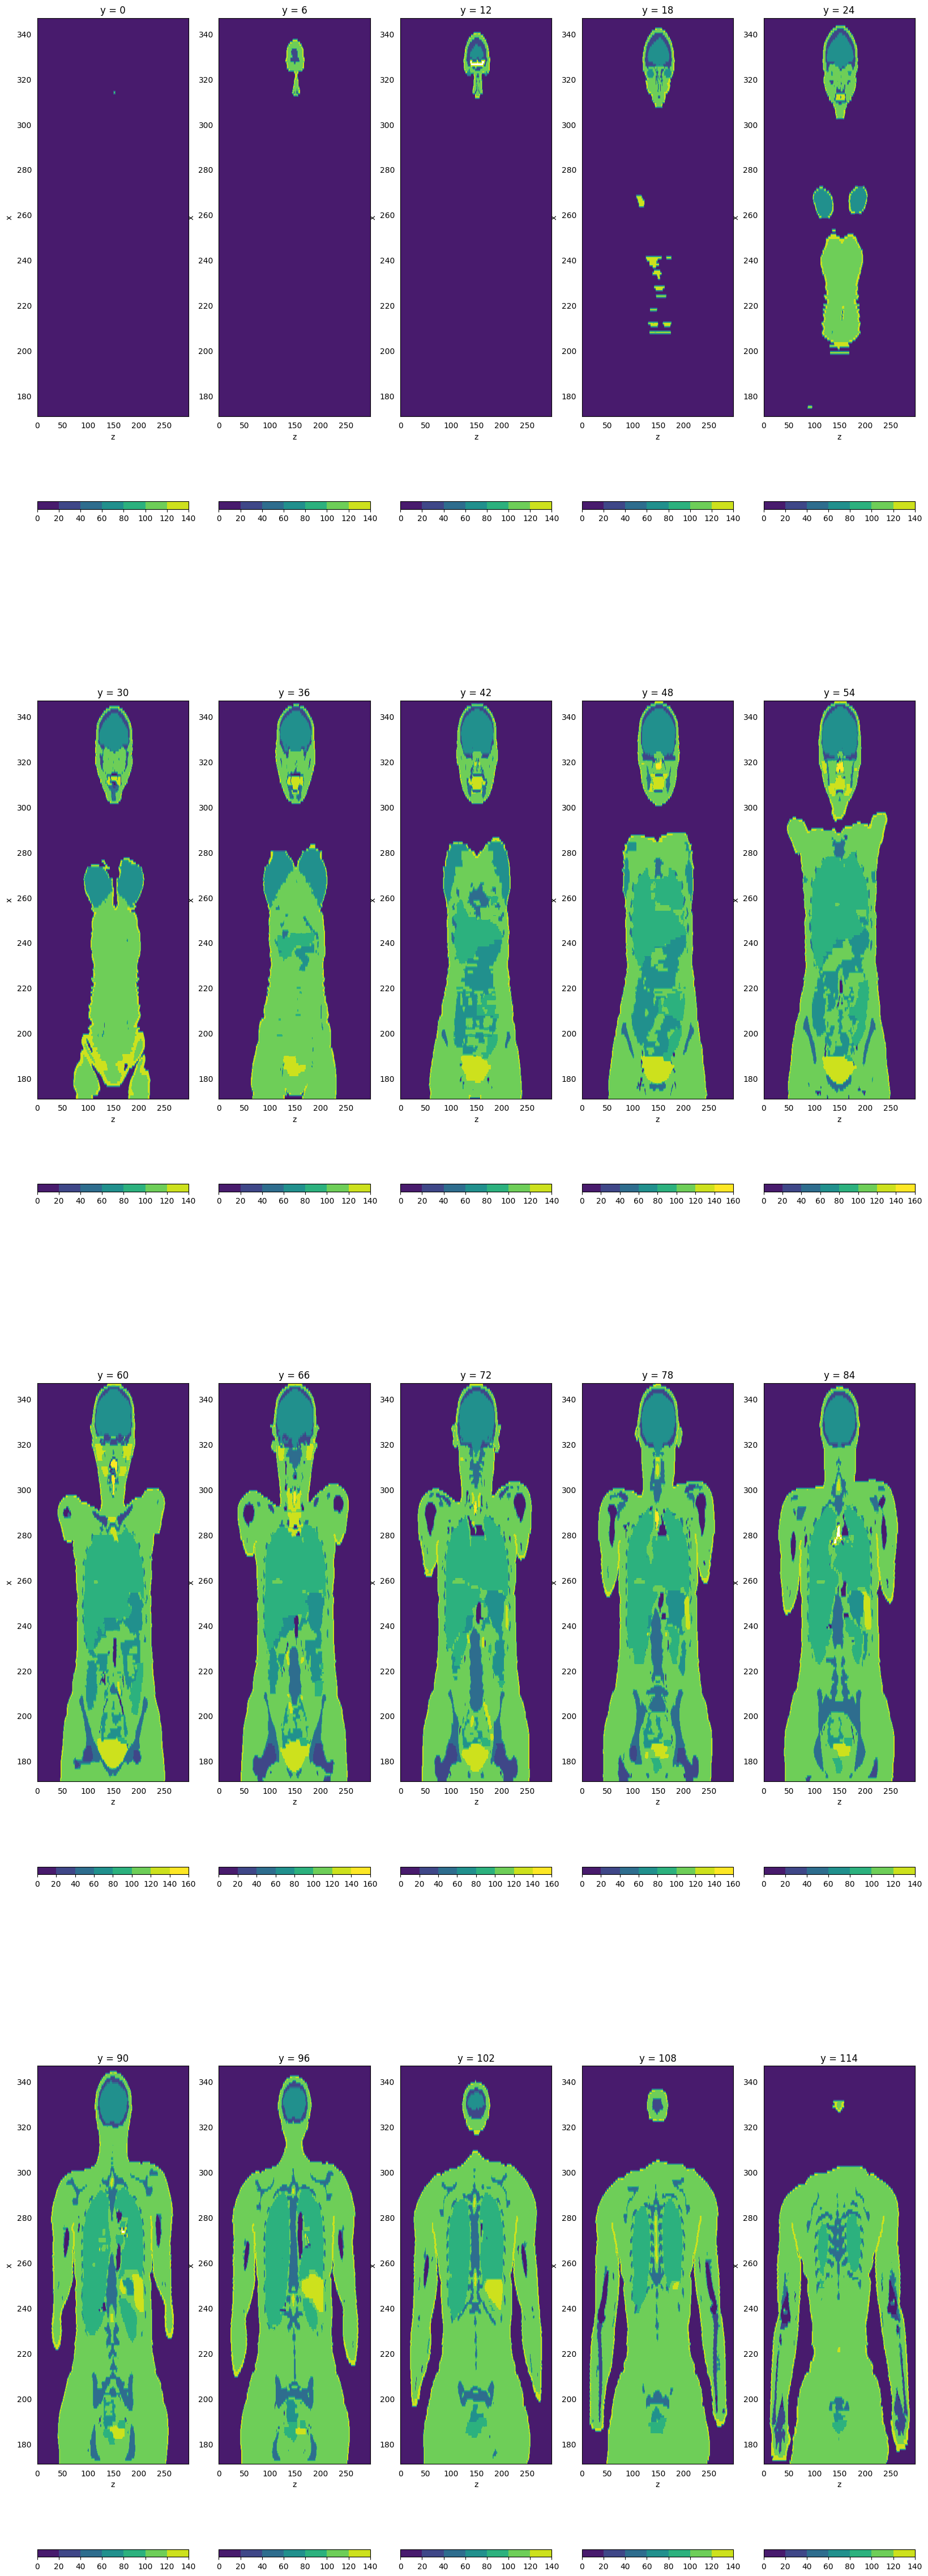

In [148]:
factores=factors(jane.Ny)
if len(factores[factores<=5])>1:
    col=factores[factores<=5][-1]
else:
    col=factores[1]
row=int(jane.Ny/col)
if john.Ny>30:
    col=5
    row=4
    muestreo=int(jane.Ny/20)
else:
    muestreo=1
## Mantiene la misma escala lineal de color para todos los cortes (excluye el cero)
norm = plt.Normalize(np.nanmin(Y[3]), max(Y[3]))
## Mantiene la misma escala log de color para todos los cortes
#norm=colors.LogNorm(np.nanmin(Y[Y[3]>0][3]), max(Y[3]))
fig, axs = plt.subplots(row, col,figsize=(20,60))
for i in range(row):
    for j in range(col):
        #im = axs[i, j].tripcolor(Y[Y[1]==(i*col+j)*muestreo][2],Y[Y[1]==(i*col+j)*muestreo][0],
        #                    Y[Y[1]==(i*col+j)*muestreo][3],norm=norm)
        im = axs[i, j].tricontourf(YY[YY[1]==(i*col+j)*muestreo][2],YY[YY[1]==(i*col+j)*muestreo][0],
                            YY[YY[1]==(i*col+j)*muestreo][3],norm=norm)
        axs[i, j].tick_params(
            axis='both',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,  # ticks along the top edge are off
            right=False,
            left=False,
            labelbottom=True,
            labelleft=True)
        axs[i, j].set_xlabel('z')
        axs[i, j].set_ylabel('x')
        axs[i, j].title.set_text('y = ' + str((i*col+j)*muestreo))
        plt.colorbar(im, ax=axs[i, j],orientation='horizontal') 

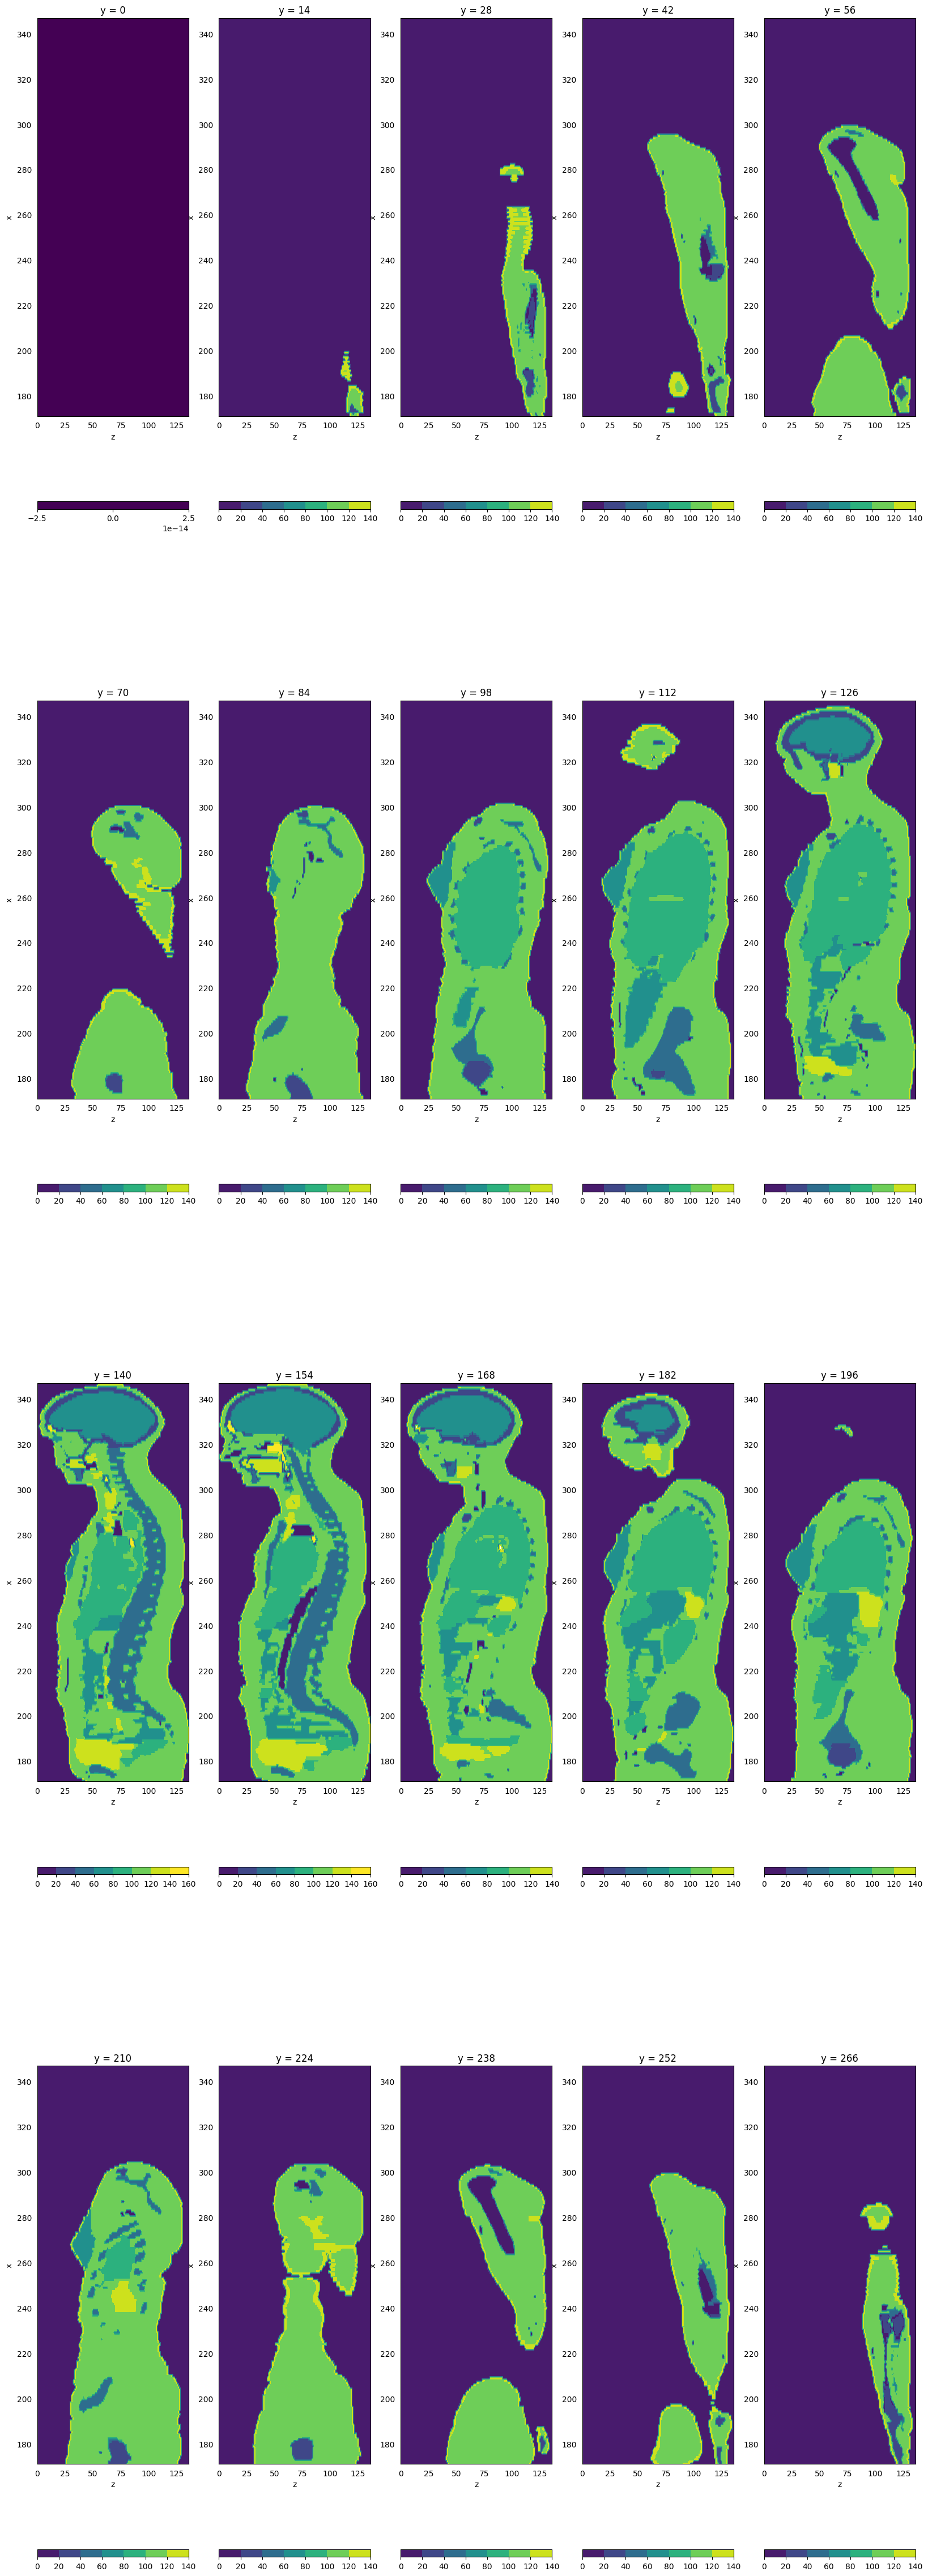

In [149]:
factores=factors(jane.Nx)
if len(factores[factores<=5])>1:
    col=factores[factores<=5][-1]
else:
    col=factores[1]
row=int(jane.Nx/col)
if john.Nx>30:
    col=5
    row=4
    muestreo=int(jane.Nx/20)
else:
    muestreo=1
## Mantiene la misma escala lineal de color para todos los cortes (excluye el cero)
norm = plt.Normalize(np.nanmin(Y[3]), max(Y[3]))
## Mantiene la misma escala log de color para todos los cortes
#norm=colors.LogNorm(np.nanmin(Y[Y[3]>0][3]), max(Y[3]))
fig, axs = plt.subplots(row, col,figsize=(20,60))
for i in range(row):
    for j in range(col):
        #im = axs[i, j].tripcolor(Y[Y[1]==(i*col+j)*muestreo][2],Y[Y[1]==(i*col+j)*muestreo][0],
        #                    Y[Y[1]==(i*col+j)*muestreo][3],norm=norm)
        im = axs[i, j].tricontourf(YY[YY[2]==(i*col+j)*muestreo][1],YY[YY[2]==(i*col+j)*muestreo][0],
                            YY[YY[2]==(i*col+j)*muestreo][3],norm=norm)
        axs[i, j].tick_params(
            axis='both',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,  # ticks along the top edge are off
            right=False,
            left=False,
            labelbottom=True,
            labelleft=True)
        axs[i, j].set_xlabel('z')
        axs[i, j].set_ylabel('x')
        axs[i, j].title.set_text('y = ' + str((i*col+j)*muestreo))
        plt.colorbar(im, ax=axs[i, j],orientation='horizontal') 